# Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [1]:

!pip install -q rnutil
import rnutil

%matplotlib notebook
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# para que los resultados sean reproducibles
np.random.seed(4)
tf.random.set_seed(4) 

     |████████████████████████████████| 1.5 MB 14.4 MB/s 
rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


# Entrena un modelo de Redes Neuronales con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

In [2]:

# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
# dataset = "2_clases_simple.csv"
# dataset = "6_clases_dificil.csv"
# dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"


# Dataset con más de 2 dimensiones
dataset = "iris.csv"
# dataset = "diabetes.csv"

# Carga del dataset
data = rnutil.load_dataset_numpy(dataset)
x,y=data[:,0:-1],data[:,-1]
# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape
# calcula la cantidad de clases
classes=int(y.max()+1)

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

Loading file from package rnutil (/usr/local/lib/python3.7/dist-packages/rnutil/data)...
Done
Información del conjunto de datos:
Ejemplos: 150
Variables de entrada: 4
Cantidad de clases: 3


# Creación y entrenamiento del modelo

Entrenando....


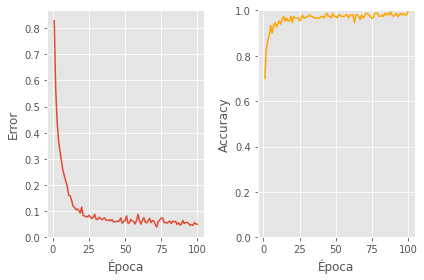

In [3]:

# Creo un modelo Red Neuronal 
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo inicial",detail=0.05)



modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
print("Entrenando....")
history = modelo.fit(x,y,epochs=100,batch_size=8,verbose=False)
rnutil.plot_loss_accuracy_keras(history)


# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    rnutil.plot_fronteras_keras(modelo,x,y,title=f"Modelo Final",detail=0.05)


# Cálculo de métricas

In [4]:
y_pred = modelo.predict(x)
rnutil.print_classification_report(y,y_pred)
if classes == 2:
    rnutil.plot_tradeoff_curves(modelo,x,y)

   Accuracy: 0.99    (150 ejemplos)
